In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as ts 
from tensorflow import keras
from keras import layers


In [2]:
#read csv's to dataframes
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [3]:
#handle missing infor using forward fill
train.ffill(inplace=True)
train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [4]:
#reshape and Normalize image data
def processImage(data):
    images = []
    for idx, sample in data.iterrows():
        image = np.array(sample['Image'].split(), dtype =int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255
    return images

In [5]:
#find target points in data
def keypoints(data):
    keypoint = data.drop(["Image"], axis=1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype ='float')
    return keypoint_features

In [6]:
x_train = processImage(train)
y_train = keypoints(train)
y_test = processImage(test))

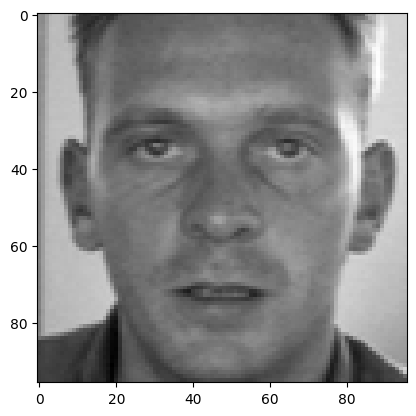

In [7]:
#visualize images
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [8]:
def modelCNN(x_train, y_train):
    #create model
    model = keras.models.Sequential([layers.Conv2D(64, (3, 3), padding='same', input_shape=(96, 96, 1)),
                                     layers.LeakyReLU(),
                                     layers.MaxPool2D((2, 2)),
                                     layers.Conv2D(128, (3, 3), padding='same'),
                                     layers.LeakyReLU(),
                                     layers.MaxPool2D((2, 2)),
                                     layers.Conv2D(128, (3, 3), padding='same'),
                                     layers.Flatten(),
                                     layers.BatchNormalization(),
                                     layers.Dense(128),
                                     layers.ReLU(),
                                     layers.Dense(96),
                                     layers.ReLU(),
                                     layers.Dense(64),
                                     layers.ReLU(),
                                     layers.Dense(30)])
    #compile model
    model.compile(optimizer='adam', loss='huber_loss', metrics=['accuracy'])
    
    #fit the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.15)
    
    return history, model

In [9]:
model = modelCNN(x_train, y_train)

Epoch 1/10
 5/24 [=====>........................] - ETA: 1:21 - loss: 44.9481 - accuracy: 0.0039

KeyboardInterrupt: 

In [ ]:
predections = model.predict(y_test)

In [ ]:
def plotSample(image, keypoint, axis):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=20, color='b')

In [ ]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plotSample(y_test[i], predections[i], axis)
plt.show()